MTMDK
Spectrum  of YDDMAAAMK has 71 peaks.


RuntimeError: Input to SpectrumAlignment is not sorted!

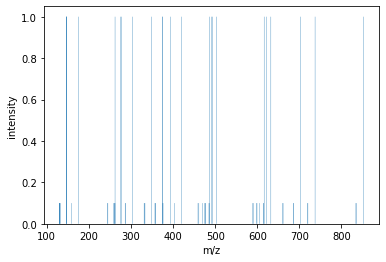

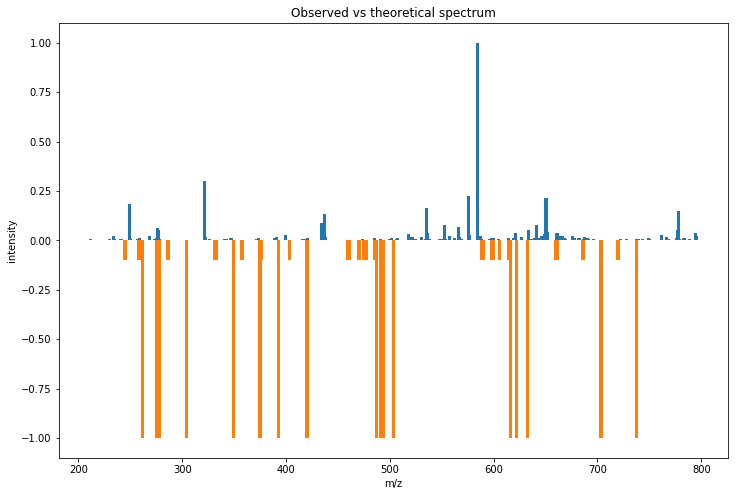

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from urllib.request import urlretrieve
from pyopenms import *
#_________Modify the file handler location 
fh = open("D:/last/compti/slides/tasks/gene.txt")
#get the sequence from file
bsa = "".join([l.strip() for l in fh.readlines()[1:]])
bsa = AASequence.fromString(bsa)
#digest  the human protiens 
digsted_peptides = []
dig = ProteaseDigestion()
dig.digest(bsa, digsted_peptides)
len(digsted_peptides)
print(digsted_peptides[0])
#preparing the theortical mass spec
spec = MSSpectrum()
tsg = TheoreticalSpectrumGenerator()
p = Param()
p.setValue("add_b_ions", "false")
p.setValue("add_a_ions", "false")
p.setValue("add_losses", "true")
p.setValue("add_metainfo", "true")
tsg.setParameters(p)
for peptide in digsted_peptides[0:5]:  # for the first 5 peptides
    tsg.getSpectrum(spec, peptide, 1, 1)
# Iterate over annotated ions and their masses
print("Spectrum  of", peptide, "has", spec.size(), "peaks.")
#for ion, peak in zip(spec.getStringDataArrays()[0], spec):
 #   print(ion.decode(), "is generated at m/z", peak.getMZ())
exp = MSExperiment()
exp.addSpectrum(spec)
plt.xlabel("m/z")
plt.ylabel("intensity")
plt.bar(spec.get_peaks()[0], spec.get_peaks()[1], snap=False) # snap ensures that all bars are rendered
#getting experimental spec
gh = "https://raw.githubusercontent.com/OpenMS/pyopenms-extra/master"
urlretrieve (gh + "/src/data/YIC(Carbamidomethyl)DNQDTISSK.mzML", "observed.mzML")
exp = MSExperiment()
MzMLFile().load("observed.mzML", exp)
exp_spec = exp.getSpectra()
first_exp_spec = exp_spec[0]#first experimental spectrum
#drawing mirror plot function 
def mirror_plot(obs_mz, obs_int, theo_mz, theo_int, title):
    obs_int = [element / max(obs_int) for element in obs_int] # relative intenstiy
    theo_int = [element * -1 for element in theo_int] # invert the intensity for the mirror plot
    plt.figure(figsize=(12,8))
    plt.bar(obs_mz, obs_int, width = 3.0)
    plt.bar(theo_mz, theo_int, width = 3.0)
    plt.title(title)
    plt.ylabel('intensity')
    plt.xlabel('m/z')
#initialzing the experimental  mz & intinsite
exp_mz, exp_int = first_exp_spec.get_peaks()

# We filter the peaks of the theoretical spectrum to fit the range (to reduce image complexity)
theo_mz, theo_int = [], []
for mz, intensity in zip(*spec.get_peaks()):
    if mz >= 200.0 and mz <= 800.0:
        theo_mz.append(mz)
        theo_int.append(intensity)

title = 'Observed vs theoretical spectrum'
mirror_plot(exp_mz, exp_int, theo_mz, theo_int, title)
# the matching alignment
alignment = []
spa = SpectrumAlignment()
ppp = spa.getParameters()
# use 0.5 Da tolerance (Note: for high-resolution data we could also use ppm by setting the is_relative_tolerance value to true)
ppp.setValue("tolerance", 0.5)
ppp.setValue("is_relative_tolerance", "false")
spa.setParameters(p)
# align both spectra
spa.getSpectrumAlignment(alignment, spec, first_exp_spec)
#MzMLFile().store("homosapiensresult.mzML", exp)
#
# Print matching ions and mz from theoretical spectrum
print("Number of matched peaks: " + str(len(alignment)))
print("ion\ttheo. m/z\tobserved m/z")

for theo_idx, obs_idx in alignment[0:20]:
    ion_name = spec.getStringDataArrays()[0][theo_idx].decode()
    ion_charge = spec.getIntegerDataArrays()[0][theo_idx]
    print(ion_name + "\t" + str(ion_charge) + "\t"
      + str(first_exp_spec[theo_idx].getMZ())
      + "\t" + str(first_exp_spec[obs_idx].getMZ()))
    

    
theo_mz, theo_int, obs_mz, obs_int = [], [], [], []
for theo_idx, obs_idx in alignment[0:20]:
    theo_mz.append(spec[theo_idx].getMZ())
    theo_int.append(spec[theo_idx].getIntensity())
    obs_mz.append(first_exp_spec[obs_idx].getMZ())
    obs_int.append(first_exp_spec[obs_idx].getIntensity())

title = 'Observed vs theoretical spectrum (aligned)'
mirror_plot(obs_mz, obs_int, theo_mz, theo_int, title)